# **Linear Regression Algorythms**

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt
from google.colab import files
import io

pd.options.display.max_rows = 10

In [ ]:
uploaded = files.upload()

Saving cereal.csv to cereal.csv


In [ ]:
cereal_df = pd.read_csv(io.StringIO(uploaded['cereal.csv'].decode('utf-8')))
cereal_df.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,14.597403,6.922078,96.077922,28.246753,2.207792,1.029610,0.821039,42.665705
std,19.484119,1.094790,1.006473,83.832295,2.383364,4.278956,4.444885,71.286813,22.342523,0.832524,0.150477,0.232716,14.047289
min,50.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,40.000000,25.000000,1.000000,1.000000,0.670000,33.174094
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.000000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.400208
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.828392
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912


In [ ]:
def build_model(my_learning_rate):

  model = tf.keras.models.Sequential()

  model.add(tf.keras.layers.Dense(units=1, input_shape=(1,)))

  model.compile(optimizer=tf.keras.optimizers.experimental.RMSprop(learning_rate=my_learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.RootMeanSquaredError()])

  return model


def train_model(model, df, feature, label, epochs, batch_size):

  history = model.fit(x=df[feature],
                      y=df[label],
                      batch_size=batch_size,
                      epochs=epochs)

  trained_weight = model.get_weights()[0]
  trained_bias = model.get_weights()[1]

  epochs = history.epoch

  hist = pd.DataFrame(history.history)

  rmse = hist["root_mean_squared_error"]

  return trained_weight, trained_bias, epochs, rmse

def plot_the_model(trained_weight, trained_bias, feature, label):

  plt.xlabel(feature)
  plt.ylabel(label)

  random_examples = cereal_df.sample(n=50)
  plt.scatter(random_examples[feature], random_examples[label])

  x0 = 0
  y0 = trained_bias
  x1 = random_examples[feature].max()
  y1 = trained_bias + (trained_weight * x1)
  plt.plot([x0, x1], [y0, y1], c='r')

  plt.show()


def plot_the_loss_curve(epochs, rmse):

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Root mean squared error")

  plt.plot(epochs, rmse, label="Loss")
  plt.legend()
  plt.ylim([rmse.min()*0.97, rmse.max()])
  plt.show()


Epoch 1/50
77/77 [==============================] - 0s 2ms/step - loss: 1027.8115 - root_mean_squared_error: 32.0595
Epoch 2/50
77/77 [==============================] - 0s 2ms/step - loss: 921.2357 - root_mean_squared_error: 30.3519
Epoch 3/50
77/77 [==============================] - 0s 2ms/step - loss: 832.2733 - root_mean_squared_error: 28.8491
Epoch 4/50
77/77 [==============================] - 0s 2ms/step - loss: 752.3096 - root_mean_squared_error: 27.4283
Epoch 5/50
77/77 [==============================] - 0s 2ms/step - loss: 677.4869 - root_mean_squared_error: 26.0286
Epoch 6/50
77/77 [==============================] - 0s 2ms/step - loss: 609.0110 - root_mean_squared_error: 24.6781
Epoch 7/50
77/77 [==============================] - 0s 2ms/step - loss: 550.9442 - root_mean_squared_error: 23.4722
Epoch 8/50
77/77 [==============================] - 0s 2ms/step - loss: 489.8400 - root_mean_squared_error: 22.1323
Epoch 9/50
77/77 [==============================] - 0s 2ms/step - loss:

/usr/local/lib/python3.8/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


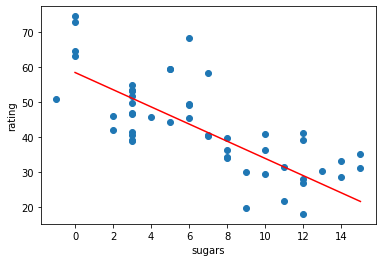

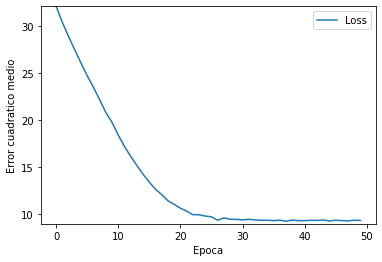

In [ ]:
learning_rate = 0.08 # Learning rate
epochs = 50 # Epochs
batch_size = 1 # Batch Size

my_feature = "sugars" # Features
my_label = "rating" # Label
my_model = None

my_model = build_model(learning_rate)

weight, bias, epochs, rmse = train_model(my_model, cereal_df,
                                         my_feature, my_label,
                                         epochs, batch_size)

print("\nThe weights (Slope) for this model is %.4f" % weight)
print("El Bias for this model is %.4f\n" % bias )

plot_the_model(weight, bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

In [ ]:
a1D = np.array([0.8, 1.5])
test = my_model.predict(a1D)
print(test)

1/1 [==============================] - 0s 151ms/step
[[56.449738]
 [54.731915]]
